In [2]:
import pandas as pd

# Load the dataset from the provided path
df = pd.read_csv("healthcare_dataset.csv")

# Display dataset info
print("=== Dataset Info ===")
print(df.info())

# Display number of rows and columns
print(f"\nTotal Records: {df.shape[0]}")
print(f"Total Features: {df.shape[1]}")

# Display first 5 rows of the dataset
print("\n=== Sample Data (First 5 Rows) ===")
print(df.head())

# Display summary statistics for numerical columns
print("\n=== Summary Statistics ===")
print(df.describe())

# Display unique values in 'Medical Condition' column
print("\n=== Unique Values in 'Medical Condition' ===")
print(df['Medical Condition'].unique())


=== Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

# Load dataset
df = pd.read_csv("healthcare_dataset.csv")

# --- 1. Handle Missing Values ---
# Check missing values
print("Missing values per column:\n", df.isnull().sum())

# Since dataset has no missing values (from inspection), but if there were:
# For numerical columns (e.g. Billing Amount), fill with mean
# df['Billing Amount'].fillna(df['Billing Amount'].mean(), inplace=True)
# For categorical columns, fill with mode
# df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)

# --- 2. Remove Duplicate Rows ---
df.drop_duplicates(inplace=True)
print(f"Data shape after removing duplicates: {df.shape}")

# --- 3. Handle Outliers ---
# Example: Remove rows with negative Billing Amounts (invalid values)
df = df[df['Billing Amount'] >= 0]
print(f"Data shape after removing negative billing amounts: {df.shape}")

# You can also handle outliers by capping at percentile values if needed
# upper_limit = df['Billing Amount'].quantile(0.99)
# df.loc[df['Billing Amount'] > upper_limit, 'Billing Amount'] = upper_limit

# --- 4. Convert Date Columns to datetime ---
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])

# Create new feature: Hospital Stay Duration in days
df['Stay Duration'] = (df['Discharge Date'] - df['Date of Admission']).dt.days 

# --- 5. Feature Encoding ---

# Label encode binary categorical column Gender
le_gender = LabelEncoder()
df['Gender'] = le_gender.fit_transform(df['Gender'])

# One-Hot encode multi-class categorical columns
df = pd.get_dummies(df, columns=['Blood Type', 'Admission Type', 'Test Results'], drop_first=True)

# Encode target column 'Medical Condition' with LabelEncoder for classification
le_condition = LabelEncoder()
df['Medical Condition'] = le_condition.fit_transform(df['Medical Condition'])

# --- 6. Feature Scaling ---

# Select numerical columns to scale
num_cols = ['Age', 'Billing Amount', 'Stay Duration']

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# Final preprocessed data info
print("Preprocessed data preview:\n", df.head())


Missing values per column:
 Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64
Data shape after removing duplicates: (54966, 15)
Data shape after removing negative billing amounts: (54860, 15)
Preprocessed data preview:
             Name       Age  Gender  Medical Condition Date of Admission  \
0  Bobby JacksOn -1.098379       1                  2        2024-01-31   
1   LesLie TErRy  0.533848       1                  5        2019-08-20   
2    DaNnY sMitH  1.247947       0                  5        2022-09-22   
3   andrEw waTtS -1.200393       0                  3        2020-11-18   
4  adrIENNE bEll -0.435287       0                  2        2022-09-19   

      

C:\Users\SHANGAR\AppData\Local\Temp\ipykernel_12004\3248768364.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Medical Condition', data=df, order=df['Medical Condition'].value_counts().index, palette='viridis')


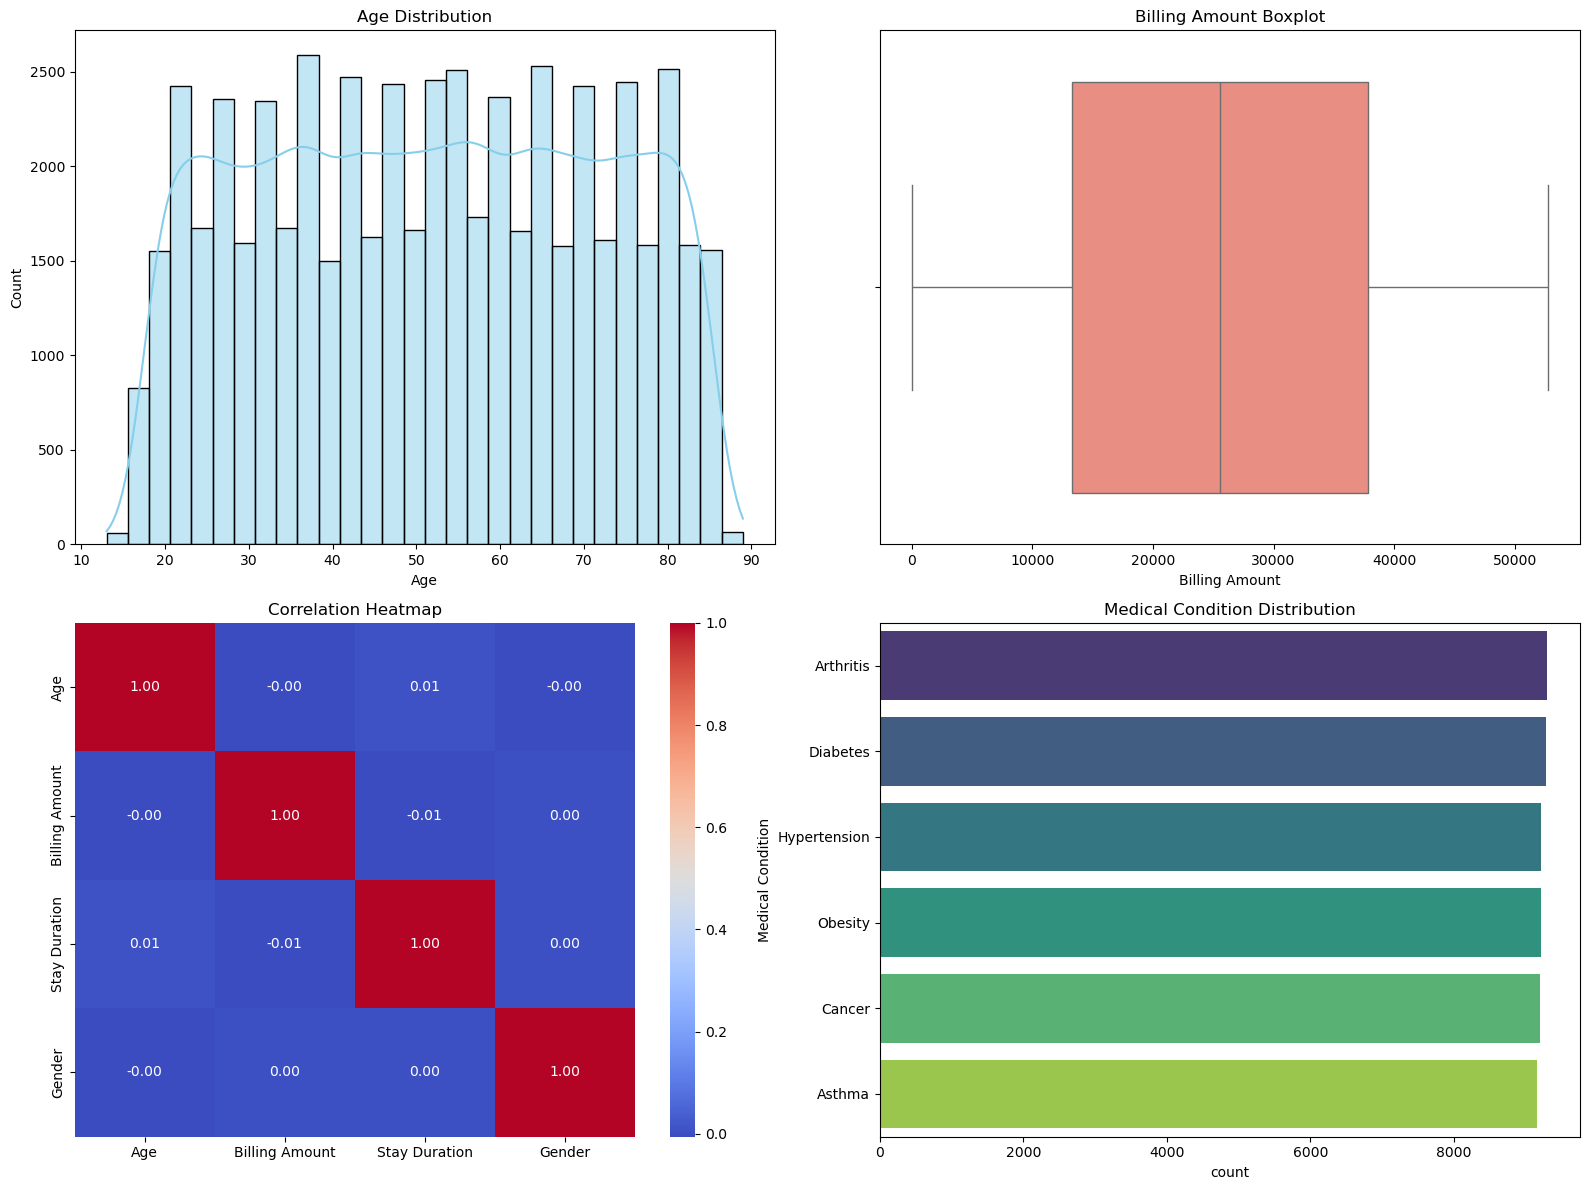

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("healthcare_dataset.csv")

# Convert date columns and compute hospital stay duration
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])
df['Stay Duration'] = (df['Discharge Date'] - df['Date of Admission']).dt.days

# Remove invalid/negative billing amounts
df = df[df['Billing Amount'] >= 0]

# Encode Gender for correlation heatmap
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

# Set the plot size
plt.figure(figsize=(16, 12))

# 1. Age Distribution Histogram
plt.subplot(2, 2, 1)
sns.histplot(df['Age'], bins=30, kde=True, color='skyblue')
plt.title('Age Distribution')

# 2. Billing Amount Boxplot
plt.subplot(2, 2, 2)
sns.boxplot(x=df['Billing Amount'], color='salmon')
plt.title('Billing Amount Boxplot')

# 3. Correlation Heatmap
plt.subplot(2, 2, 3)
corr = df[['Age', 'Billing Amount', 'Stay Duration', 'Gender']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')

# 4. Medical Condition Frequency
plt.subplot(2, 2, 4)
sns.countplot(y='Medical Condition', data=df, order=df['Medical Condition'].value_counts().index, palette='viridis')
plt.title('Medical Condition Distribution')

# Layout adjustment
plt.tight_layout()
plt.show()


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Load data
df = pd.read_csv("healthcare_dataset.csv")

# Preprocessing steps
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])
df['Stay Duration'] = (df['Discharge Date'] - df['Date of Admission']).dt.days
df = df[df['Billing Amount'] >= 0]
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df['Medical Condition'] = LabelEncoder().fit_transform(df['Medical Condition'])

# Select features (remove text-heavy ones like Name, Doctor, Hospital, etc.)
X = df[['Age', 'Gender', 'Billing Amount', 'Stay Duration']]
y = df['Medical Condition']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}

# Train and evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"=== {name} ===")
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))


=== Logistic Regression ===
              precision    recall  f1-score   support

           0       0.16      0.08      0.10      1860
           1       0.15      0.17      0.16      1833
           2       0.16      0.28      0.21      1842
           3       0.17      0.10      0.12      1857
           4       0.17      0.13      0.15      1845
           5       0.16      0.22      0.19      1842

    accuracy                           0.16     11079
   macro avg       0.16      0.16      0.15     11079
weighted avg       0.16      0.16      0.15     11079

=== KNN ===
              precision    recall  f1-score   support

           0       0.18      0.29      0.22      1860
           1       0.19      0.21      0.20      1833
           2       0.19      0.18      0.19      1842
           3       0.20      0.17      0.18      1857
           4       0.19      0.15      0.17      1845
           5       0.19      0.13      0.15      1842

    accuracy                         

C:\Users\SHANGAR\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:09:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


=== XGBoost ===
              precision    recall  f1-score   support

           0       0.18      0.18      0.18      1860
           1       0.18      0.18      0.18      1833
           2       0.19      0.18      0.18      1842
           3       0.19      0.19      0.19      1857
           4       0.19      0.19      0.19      1845
           5       0.18      0.20      0.19      1842

    accuracy                           0.18     11079
   macro avg       0.18      0.18      0.18     11079
weighted avg       0.18      0.18      0.18     11079



C:\Users\SHANGAR\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:09:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.185
F1 Score: 0.185
ROC AUC (macro-average): 0.524
RMSE: 2.399


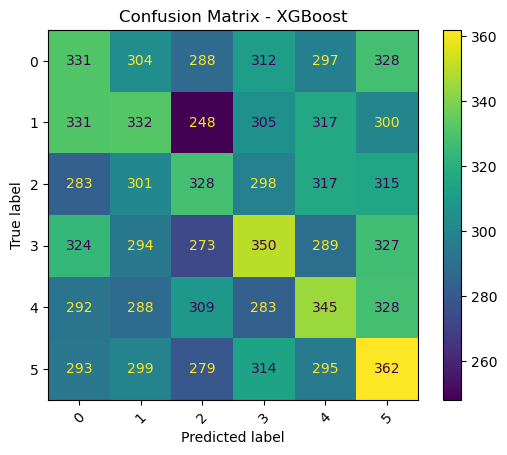

In [8]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve
import numpy as np
import matplotlib.pyplot as plt

# Use best model: XGBoost
from xgboost import XGBClassifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions and probabilities
y_pred = xgb_model.predict(X_test)
y_prob = xgb_model.predict_proba(X_test)

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr', average='macro')
rmse = np.sqrt(np.mean((y_test - y_pred) ** 2))



# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(xticks_rotation=45)
plt.title("Confusion Matrix - XGBoost")
plt.show()
